## **Train a binary classification model**

In [1]:
# Import the libraries that needed
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [2]:
# Import and read the dataset
df = pd.read_csv("./Bank Customer Churn Prediction.csv")
df 

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### EDA

In [3]:
# Check the count of non-null value and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
# Check what the values ​​of the variables are and the count of it
print(df['customer_id'].nunique())
print(df['country'].value_counts())
print(df['gender'].value_counts())
print(df['credit_card'].value_counts())
print(df['active_member'].value_counts())
print(df['churn'].value_counts())

10000
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
gender
Male      5457
Female    4543
Name: count, dtype: int64
credit_card
1    7055
0    2945
Name: count, dtype: int64
active_member
1    5151
0    4849
Name: count, dtype: int64
churn
0    7963
1    2037
Name: count, dtype: int64


In [5]:
# Check the descriptive statistic of the data
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Check the sum of missing values
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
# Check duplicate rows
df.duplicated().sum()

0

There is no missing value and there is no duplicated row

In [8]:
# Encoding the data type of 
df[['customer_id', 'credit_card', 'active_member', 'churn']] = df[['customer_id', 'credit_card', 'active_member', 'churn']].astype('object')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  object 
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  object 
 9   active_member     10000 non-null  object 
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB
None


In [9]:
# Categorize the column whether it is a categorical or numerical column
categorical_columns = []
numerical_columns = []

for i in df.columns:
    #print(str(df[i].dtype))
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['customer_id', 'country', 'gender', 'credit_card', 'active_member', 'churn']
Numeric: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']


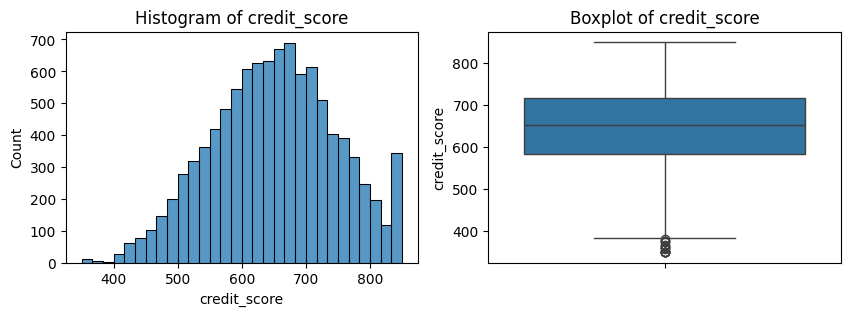

Skewness: -0.07160660820092675
Kurtosis: -0.42572568480291295


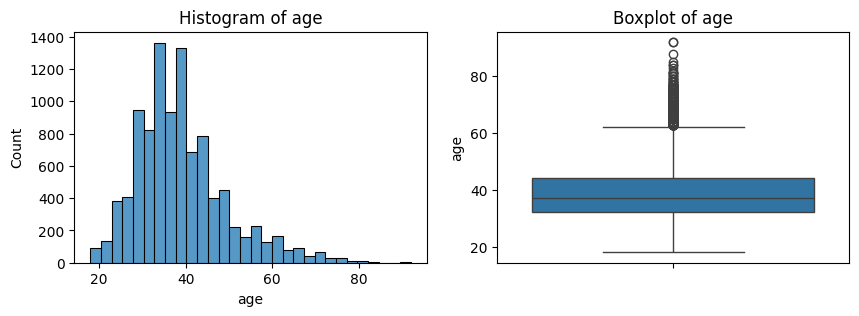

Skewness: 1.0113202630234552
Kurtosis: 1.3953470615086956


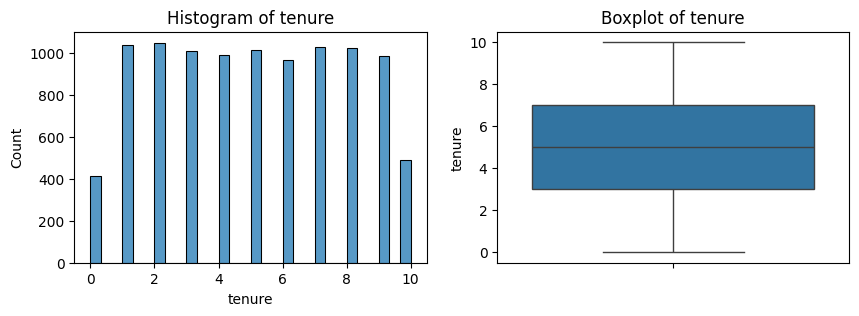

Skewness: 0.01099145797717904
Kurtosis: -1.1652252274891766


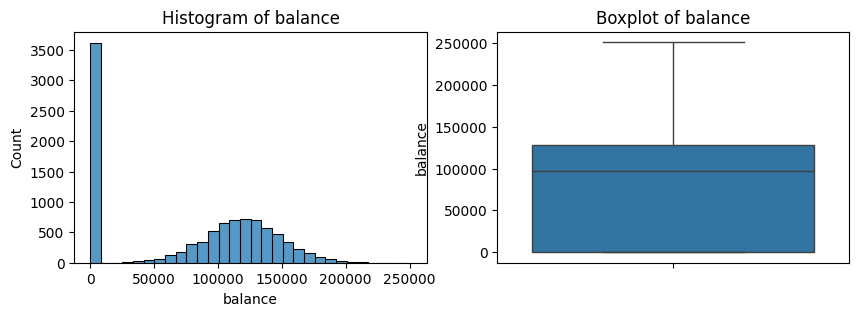

Skewness: -0.14110871094154384
Kurtosis: -1.489411767941925


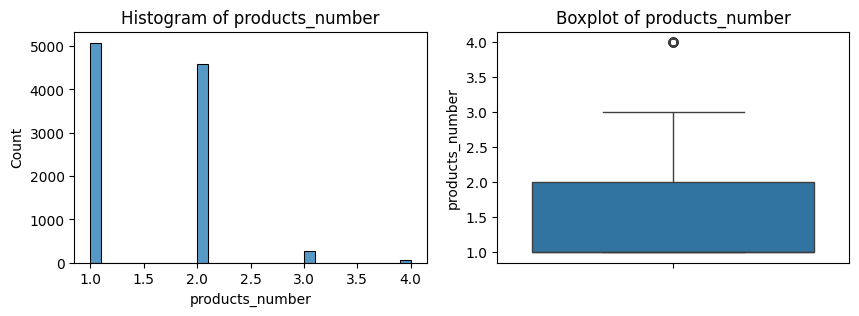

Skewness: 0.7455678882823168
Kurtosis: 0.5829807629457178


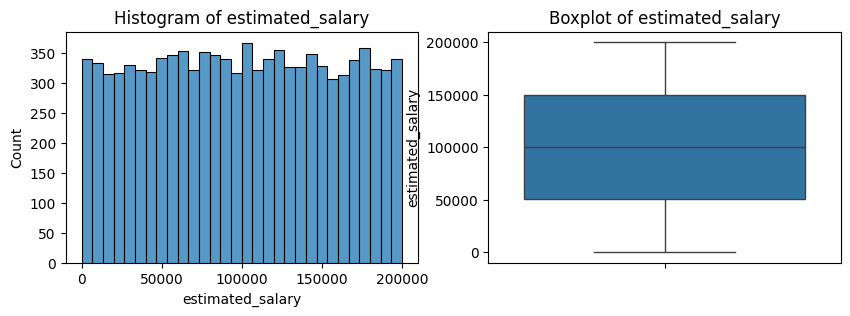

Skewness: 0.0020853576615585162
Kurtosis: -1.1815184473915485


In [10]:
# Visualization - Check the distribution of the data
def check_distribution(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution(df[numerical_columns], numerical_columns)

From the boxplot above, we can get information that variables with outliers are credit_score, age, and products_number.

The skewness gives us information about the distribution of the data. If the skewness = 0, then the data approaches a normal distribution.
If the skewness is positive (right skewed), then data is mostly concentrated on the left. If the skewness is negative (left skewed), then data is mostly concentrated on the right.

The kurtosis gives us information about the distribution peak height. If the kurtosis is high (the distribution peak is high and narrow), it means the data has many outliers. If the kurtosis is low (the distribution tends to have wider peaks), it means the data is spread more evenly around the mean and has few outliers.

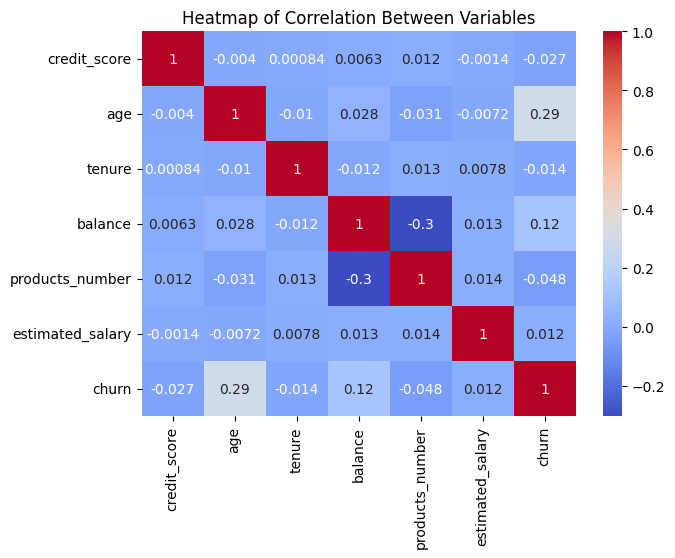

In [11]:
# Visualization - Check the correlation between variables
df2 = df
df2[['churn']] = df2[['churn']].astype('int')

numerical_columns2 = []

for i in df.columns:
    #print(str(df[i].dtype))
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns2.append(i)
# print(numerical_columns2)

corr = df2[numerical_columns2].corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Between Variables")
plt.show()

From the heatmap above, we can conclude that the correlation between age and churn column is the strongest among the other variables. Then, the second strongest is the correlation between balance and churn column. The other numerical column has a very weak correlation with churn variable. 

It also gives us the linearity information, that overall the data is non-linear. This linearity information is one of the considerations in selecting the algorithm later. 

### Pre-process The Data

There is no winsorizing method. Variables that have outliers are credit_score, age, and products_number. My considerations why I don't handle those outliers are:
1. Outliers can represent genuine variations in the data. Removing or altering them might lead to a loss of important information, especially if these outliers are indicative of specific customer behaviors, like in products_number.
2. In some cases, outliers can provide valuable insights that improve the performance of predictive models. For example, extreme values in credit scores or age might highlight high-risk or high-value customers, which could be crucial for churn prediction.

In [12]:
# Determine the predictor and target variable
x = df.iloc[:, 1:11]
y = df['churn']
# print(x.head(5))
# print(y.head())

In [13]:
# Split the dataset (80% for train data and 20% for test data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print(x_test)
# print(x_train)
# print(y_test)
# print(y_train)

In [14]:
# Do binary encoding
binary_columns = ['country', 'gender', 'active_member', 'credit_card']
binary_encoder = LabelEncoder()

for col in binary_columns:
    x_train[col] = binary_encoder.fit_transform(x_train[[col]])
    x_test[col] = binary_encoder.transform(x_test[[col]])

# x_train.head()
# x_test.head()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\skl

In [15]:
# Do the normality test using shapiro method 
from scipy.stats import shapiro
for i in numerical_columns:
    print(i, shapiro(df[i]))

credit_score ShapiroResult(statistic=0.9939263463020325, pvalue=3.532837989895404e-20)
age ShapiroResult(statistic=0.9441365003585815, pvalue=0.0)
tenure ShapiroResult(statistic=0.9486214518547058, pvalue=0.0)
balance ShapiroResult(statistic=0.8455799221992493, pvalue=0.0)
products_number ShapiroResult(statistic=0.7061033248901367, pvalue=0.0)
estimated_salary ShapiroResult(statistic=0.9566370844841003, pvalue=0.0)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


From saphiro test above, we can conclude that those variables are not normally distributed because p-value < 0.05 (reject the H0).

That's why I will do scaling using robust scaler.

In [16]:
# Do scaling using robust scaler
scaler = RobustScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Below I will train and evaluate the model using KNN, Random Forest, and SVM algorithm. Those 3 algorithms are chosen because they are good for doing binary classification. KNN works well for non-linear decision boundaries. Random Forest can handle non-linear relationship well and robust to overfitting. While, SVM is robust to outliers. I will compare the accuracy, precision, recall, and F1 score of those 3 algorithms later and choose the best one. 

### **a. KNN**

### Train The Model

I train the model using scaled data because KNN relies on distance metrics to find the closest neighbors. Unscaled features may dominate teh distance calculations and bias the model.

In [17]:
# Create a model using the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_scaled, y_train)
y_result_knn = knn.predict(x_test_scaled)

### Evaluate The Model

[[1560   47]
 [ 257  136]]


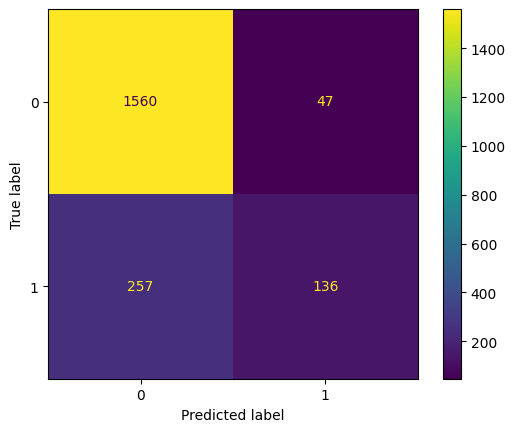

In [18]:
cm_knn = confusion_matrix(y_test, y_result_knn)
print(cm_knn) 

display_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = [0, 1])

display_knn.plot()
plt.show()

In [19]:
# Do evaluation using classification report
report_knn = classification_report(y_test, y_result_knn)
print(f"Classificaton report:\n {report_knn}")

Classificaton report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.74      0.35      0.47       393

    accuracy                           0.85      2000
   macro avg       0.80      0.66      0.69      2000
weighted avg       0.84      0.85      0.82      2000



### **b. Random Forest Classifier**

### Train The Model

I train the model using unscaled data because random forest based on decision tree that works by splitting data based on feature values. In other words, scaling will not improve the random forest's model performance because it doesn't rely on distance calculation.

In [20]:
# Create a model using the random forest algorithm
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)  
rf.fit(x_train, y_train)
y_result_rf = rf.predict(x_test)

### Evaluate The Model

[[1546   61]
 [ 210  183]]


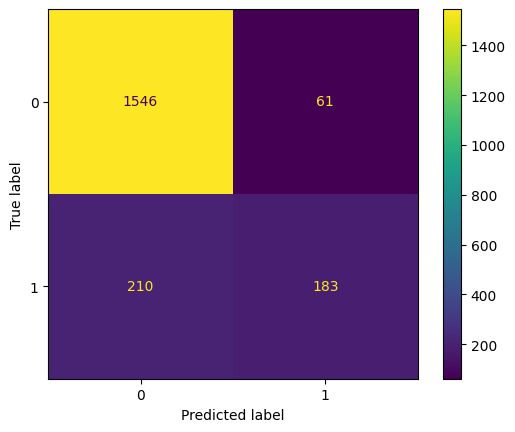

In [21]:
cm_rf = confusion_matrix(y_test, y_result_rf)
print(cm_rf) 

display_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = [0, 1])

display_rf.plot()
plt.show()

In [22]:
# Do evaluation using classification report
report_rf = classification_report(y_test, y_result_rf)
print(f"Classificaton report:\n {report_rf}")

Classificaton report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### **c. SVM** 


### Train Model

I use scaled data because SVM also use distance calculation, like margin between support vector.

In [23]:
# Create a model using the SVM algorithm
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(x_train_scaled, y_train)
y_result_svm = svm.predict(x_test_scaled)

### Evaluate The Model

[[1573   34]
 [ 248  145]]


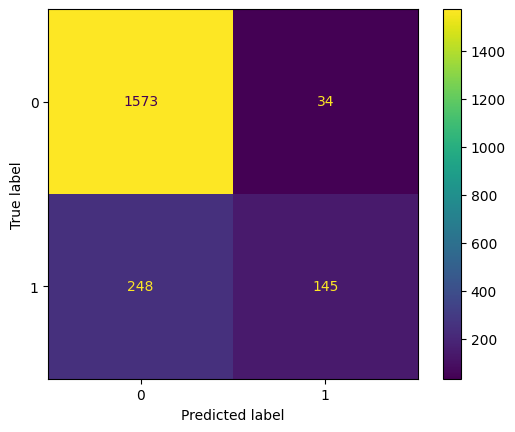

In [24]:
cm_svm = confusion_matrix(y_test, y_result_svm)
print(cm_svm) 

display_svm = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = [0, 1])

display_svm.plot()
plt.show()

In [25]:
# Do evaluation using classification report
report_svm = classification_report(y_test, y_result_svm)
print(f"Classificaton report:\n {report_svm}")

Classificaton report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.81      0.37      0.51       393

    accuracy                           0.86      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



### **Algorithm: Random Forest Classifier**

**The reason behind choosing random forest**
1. The macro avg between random forest model and SVM model gives us information that random forest model is slightly better than SVM model. Macro avg tells us about the average of metric in every classes without considering number of instances in each class. For the recall and F1, random forest has higher score than SVM model. 
2. The False Negative (FN) of random forest model is the lowest, which means good, because we want to minimize the number of customers who are predicted not churn but actually churn. Losing customers is more detrimental to a business and much harder to fix rather than retaining them. Random forest model has the highest recall score (0.71).
3. Random forest can work well even in imbalance dataset, especially in this dataset where "not churn" class is more than "churn" class.
4. Random forest is more resistant to outliers.

## **Perform fine-tuning using GridSearchCV, explain the result**

### Fine-tuning

In [26]:
# Set the parameters for fine-tuning the random forest model above
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
param_grid = {
    'n_estimators': n_estimators, # the number of trees in the forest
    'max_depth': [None, 15, 30], # the maximum level of each tree -> a deeper tree is more overfitted
    'max_features': [None, 'sqrt', 'log2'], # the number of features -> prevent overfitting
}

In [27]:
# Set up the random forest model
rf2 = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf2, 
                           param_grid=param_grid, 
                           scoring='accuracy', # how the model performance will be evaluated
                           cv=5, # cross validation splitting strategy
                           verbose=2, # controls the amount of output printed to the console
                           n_jobs=-1) # number of CPU cores to use for parallel processing

# Do the fitting process
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 15, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 111, 122, 133, 144, 155, 166,
                                          177, 188, 200]},
             scoring='accuracy', verbose=2)

In [28]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 188}


In [29]:
# Predictions on the test set
best_rf = grid_search.best_estimator_
y_result_rf2 = best_rf.predict(x_test)

In [30]:
# Evaluate using classification report
report_rf2 = classification_report(y_test, y_result_rf2)
print(f"Classification report:\n {report_rf}")
print(f"Classification report:\n {report_rf2}")

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



From the result above, the accuracy score, F1 score, weighted average for precision and recall have increased by 0.01 or 1% after doing the fine-tuning process. This inmprovement occurs using parameters, such as n_estimator 188, max_depth None, and max_features sqrt.

**Conclusion**
- Fine-tuning gives just a small improvement (1%). It means the model's performance was already close to optimal before tuning. GridSearchCV found a slightly better hyperparameter combination, but the overall gain was minimal.
- The fine-tuning process might not be worth the extra computational time. 